In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [48]:
df=pd.read_csv("loan.csv")

In [49]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
data=df.copy()

In [152]:
def impute_nan(df,var):
    mean=df[var].mean()
    df[var]=df[var].fillna(mean)


In [153]:
for i in ["LoanAmount","Loan_Amount_Term","Credit_History"]:
    impute_nan(data,i)

In [154]:
def impute_nan_cat(df,var):
    mean=df[var].mode()[0]
    df[var]=df[var].fillna(mean)


In [155]:
for i in ["Gender","Married","Dependents","Self_Employed"]:
    impute_nan_cat(data,i)

In [156]:
#data['ApplicantIncome']=np.log(data['ApplicantIncome'])
#data['CoapplicantIncome']=np.log(data['CoapplicantIncome']+1)
#data['LoanAmount']=np.log(data['LoanAmount']+1)
#data['Loan_Amount_Term']=np.log(data['Loan_Amount_Term'])

<AxesSubplot:>

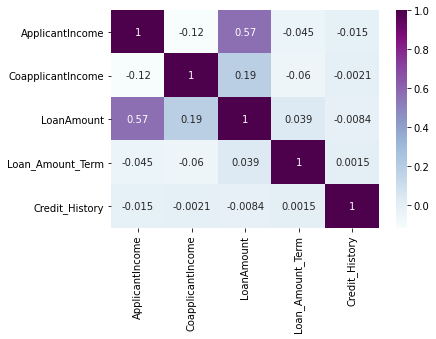

In [157]:
corr=df.corr()
sns.heatmap(corr,annot=True, cmap="BuPu")

In [158]:
data.drop("Loan_ID",axis=1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [160]:
from sklearn.preprocessing import LabelEncoder

cols=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
le=LabelEncoder()
for i in cols:
    data[i]=le.fit_transform(data[i])

In [161]:
Y=data["Loan_Status"]
X=data.drop("Loan_Status",axis=1)

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [163]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()



In [164]:
model.fit(X_train,Y_train)

LogisticRegression()

In [166]:
model.score(X_train,Y_train)

0.8205128205128205

In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

pred=model.predict(X_test)
confusion_matrix(Y_test,pred)

array([[ 28,  37],
       [  2, 118]], dtype=int64)